In [114]:
from scipy import signal, io
import numpy as np
import matplotlib.pyplot as plt

In [115]:
sample_rate, data = io.wavfile.read('../data/Diviner.wav')
data_pts = data.shape[0]
length = 6*60
print(sample_rate, data.shape)
data.shape[0]/sample_rate

48000 (17324470, 2)


360.92645833333336

In [116]:
# take only part of the song to begin with
fraction = 1/6
subset = int(fraction*data_pts)
length = length*fraction
audio_l, audio_r = data[:subset, 0], data[:subset, 1]

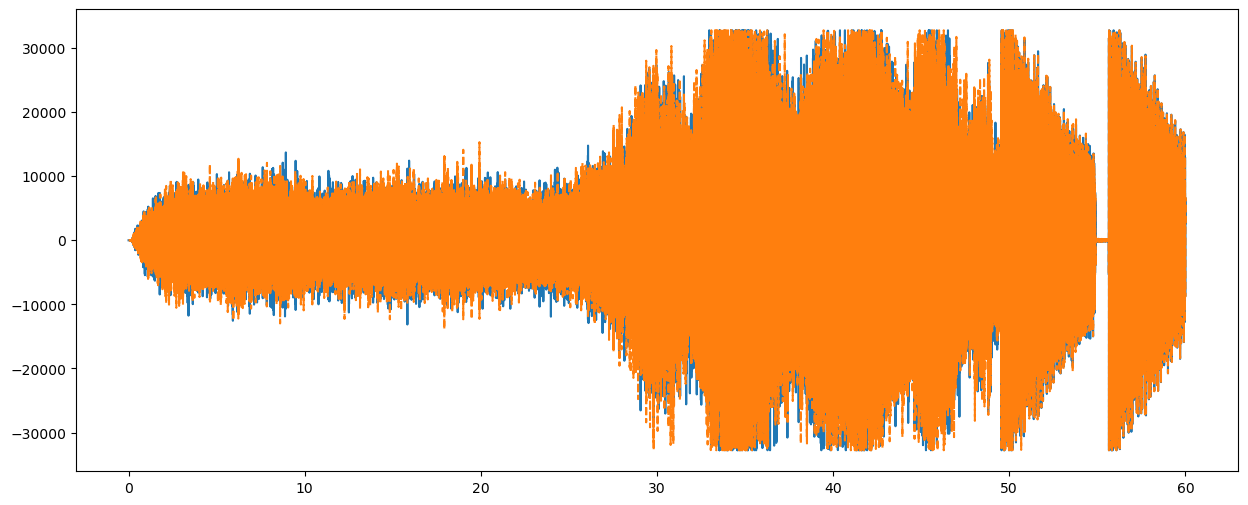

In [117]:
time = np.linspace(0, length, audio_l.shape[0])
plt.figure(figsize=(15,6))
plt.plot(time, audio_l)
plt.plot(time, audio_r, linestyle='--')

In [118]:
f, t, Sxx = signal.spectrogram(audio_l, sample_rate)
print(audio_l.shape)
print(audio_l.shape[0]/sample_rate)

(2887411,)
60.15439583333333


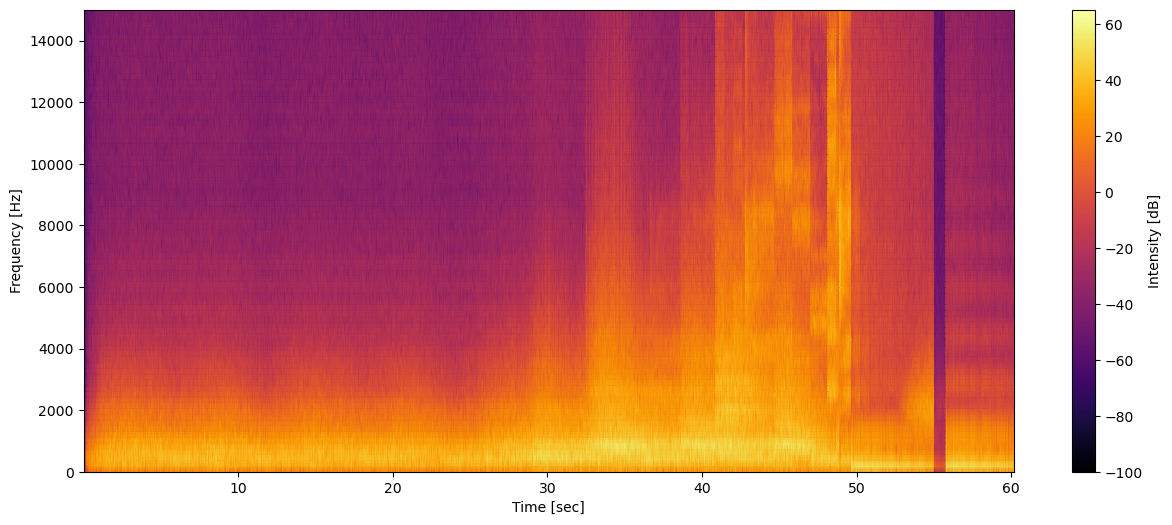

In [119]:
# Apply logarithmic scale for colormap to visualize better
Sxx_log = 10 * np.log10(Sxx + 1e-10)  # Adding a small value to avoid log(0)

plt.figure(figsize=(15, 6))
plt.pcolormesh(t, f, Sxx_log, shading='gouraud', cmap='inferno') # 'inferno' colormap is commonly used for spectrograms
plt.colorbar(label='Intensity [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 15000)  # You might want to limit frequency range to make it clearer
plt.show()